# Exploring World Happiness Data for 2016
### I would like to explore how the countries around the world are ranked in Happiness and how happiness of a country is related to the life expectancy & Money

In [340]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.plotly as py

In [341]:
df1=pd.read_csv('./worldhappiness/2016.csv')

In [342]:
# Function for Converting the Country Name to 3 digits code for Choropleth map

import pycountry

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3


def getcountrycode(countryname):
    return(countries.get(countryname, 'Unknown code') )



In [343]:
df1['Code']=df1['Country'].apply(getcountrycode)

In [344]:
df1[df1['Code']=='Unknown code'].count()

Country                          20
Region                           20
Happiness Rank                   20
Happiness Score                  20
Lower Confidence Interval        20
Upper Confidence Interval        20
Economy (GDP per Capita)         20
Family                           20
Health (Life Expectancy)         20
Freedom                          20
Trust (Government Corruption)    20
Generosity                       20
Dystopia Residual                20
Code                             20
dtype: int64

In [345]:
df1=df1[df1['Code']!='Unknown code']

In [346]:
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
        type = 'choropleth',
        locations = df1['Code'],
        z = df1['Happiness Rank'],
        text = df1['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(120,120,120)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Happiness<br>Rank'),
      ) ]


layout = dict(
    title = '2016 Happiness Index:',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

[<matplotlib.text.Text at 0x1430e50f0>, <matplotlib.text.Text at 0x1430c6f98>]

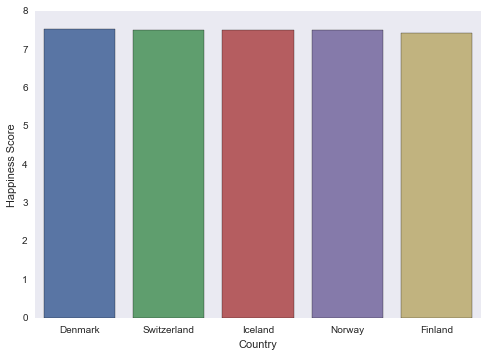

In [353]:
# Top Five happiest countries in world and their Happiness Score
sns.set_style("dark")
df2=df1.sort_values(by=['Happiness Rank'],ascending=True).head(5)
ax=sns.barplot(x='Country',y='Happiness Score',data=df2)
ax.set(xlabel='Country', ylabel='Happiness Score')

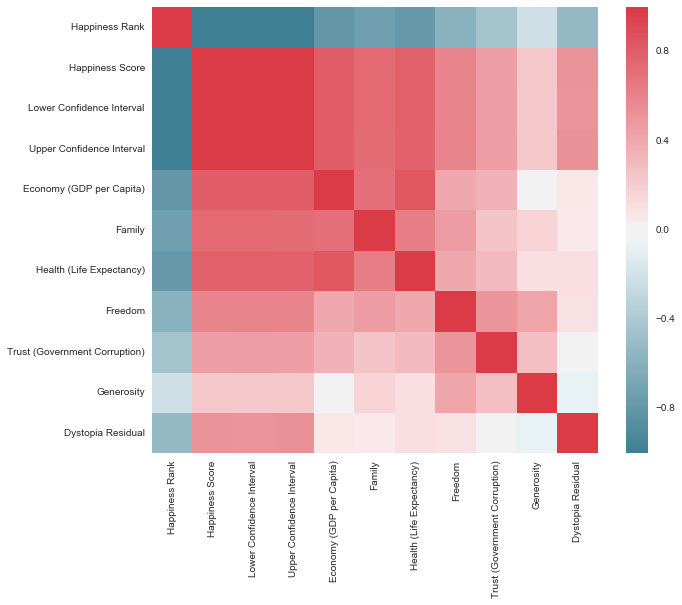

In [348]:
#Heatmap to find correlation between each of the features 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
f, ax = pl.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

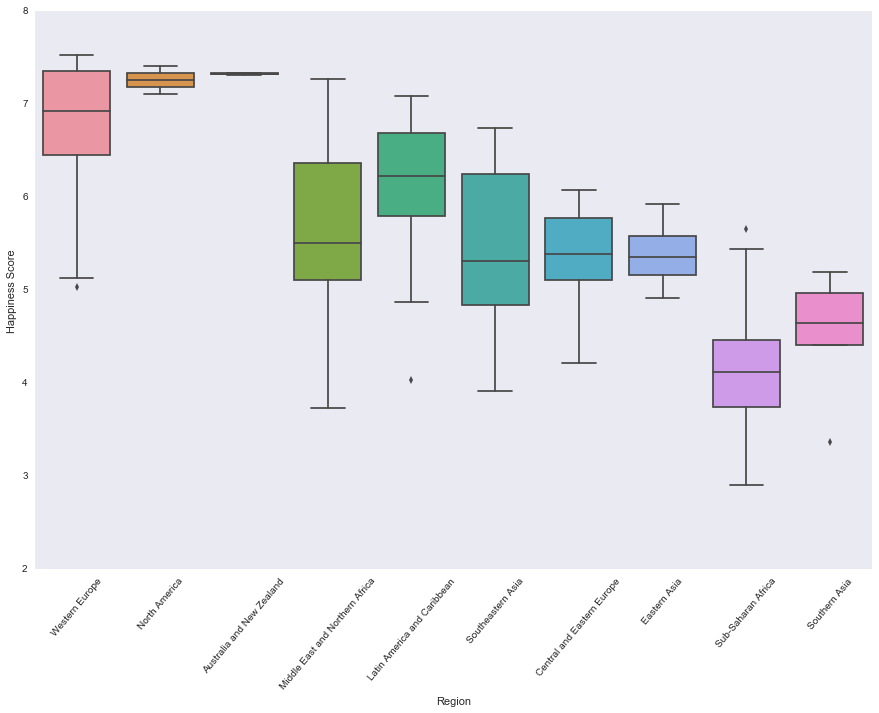

In [354]:
#Box Plot of Happiness Score by Each Region
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(15,10))
sns.boxplot(x="Region", y="Happiness Score", data=df1)
plt.xticks(rotation=50)

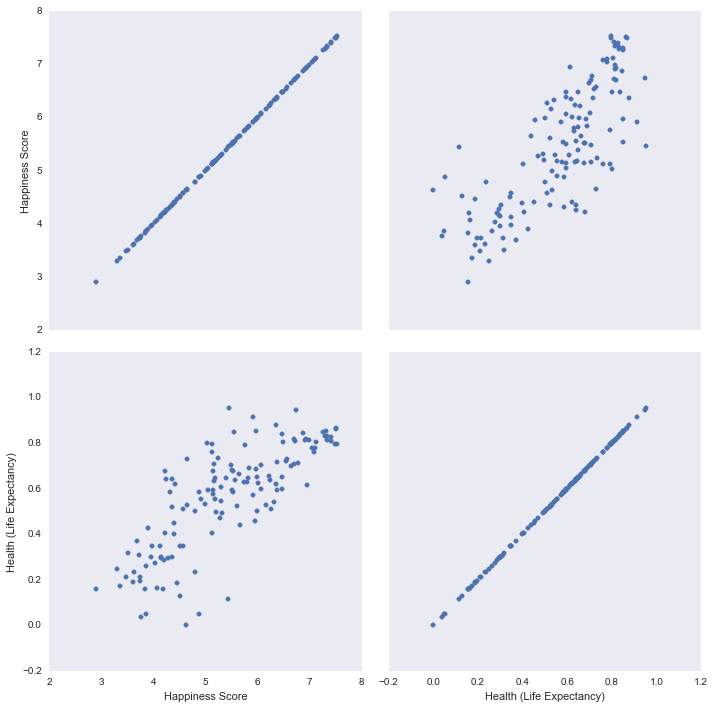

In [355]:
#Happiness Score & Life Expectancy

g = sns.PairGrid(df1, vars=["Happiness Score", "Health (Life Expectancy)"], size=5)
g.map(plt.scatter)


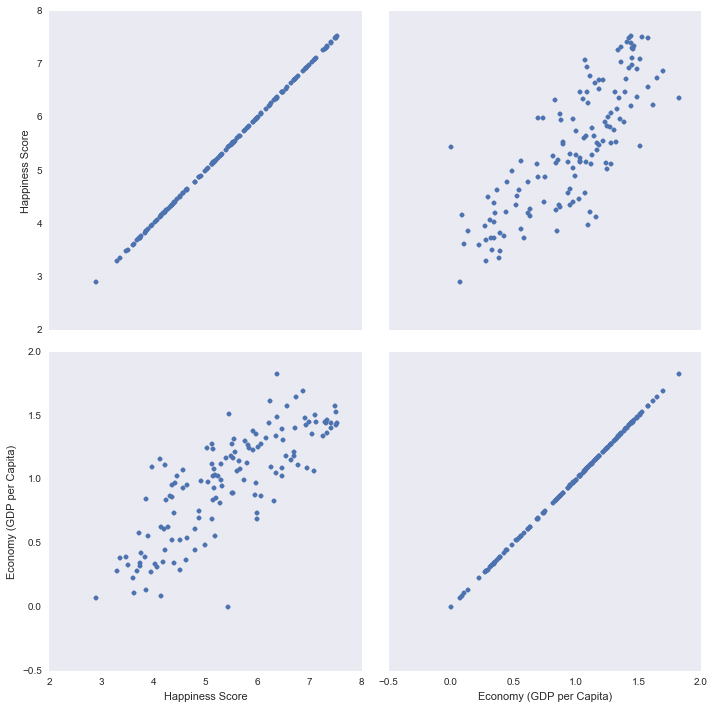

In [356]:
# Happiness Score & Economy
g = sns.PairGrid(df1, vars=["Happiness Score", "Economy (GDP per Capita)"], size=5)
g.map(plt.scatter)